<a href="https://colab.research.google.com/github/phys-ken/IRT-for-PhysicsEducation/blob/main/ICCPLOT%E3%82%92%E6%9B%B8%E3%81%8F%EF%BC%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#パッケージのインストール
!pip install japanize-matplotlib
!pip install sympy
!pip install pyirt
#ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
from sympy import *
import numpy as np
# SciPy積分パッケージをインポート
from scipy import integrate

In [ ]:
from google.colab import files
print("項目特性図作成支援システムが出力したcsvファイルを選択してください。")
print("※同じファイルを2回アップロードすると、ファイル名の重複が起きて動作が安定しなくなります。")
print("　ページ左のファイルマネージャから元のファイルを削除してください。")
uploaded = files.upload()
for fn in uploaded.keys():
  print("ファイル名は [ " + fn + " ] です")

項目特性図作成支援システムが出力したcsvファイルを選択してください。
※同じファイルを2回アップロードすると、ファイル名の重複が起きて動作が安定しなくなります。
　ページ左のファイルマネージャから元のファイルを削除してください。


Saving ☆pyirt用_MWCS2_神大ポスト.csv to ☆pyirt用_MWCS2_神大ポスト.csv
ファイル名は [ ☆pyirt用_MWCS2_神大ポスト.csv ] です


In [ ]:
from pyirt import irt
file_path = fn

src_fp = open(file_path,'r')

# alternatively, pass in list of tuples in the format of [(user_id, item_id, ans_boolean)]
# ans_boolean is 0/1.


# (1)Run by default
item_param, user_param = irt(src_fp)
print("***************************************************")
print("項目母数の推定が終わりました！")


#設問数を取得
qcnt = len(item_param) + 1

#項目母数を配列に入れる
alist = []
for q in range(1,qcnt):
  alist.append(item_param["QQ" + str(q)]["alpha"])

blist = []
for q in range(1,qcnt):
  blist.append(item_param["QQ" + str(q)]["beta"])

clist = []
for q in range(1,qcnt):
  clist.append(item_param["QQ" + str(q)]["c"])

titlelist = []
for q in range(1,qcnt):
  titlelist.append("QQ" + str(q).zfill(3))

print("項目母数をリストに入れました！")

2020-12-26 04:37:01 INFO: start loading data
start loading data
start loading data
start loading data
2020-12-26 04:37:01 INFO: data loaded
data loaded
data loaded
data loaded
100%|██████████| 22/22 [00:00<00:00, 4898.33it/s]
2020-12-26 04:37:01 DEBUG: E step runs for 253.866 sec
E step runs for 253.866 sec
E step runs for 253.866 sec
E step runs for 253.866 sec
100%|██████████| 22/22 [00:00<00:00, 801.43it/s]
2020-12-26 04:37:01 DEBUG: M step runs for 129.864 sec
M step runs for 129.864 sec
M step runs for 129.864 sec
M step runs for 129.864 sec
2020-12-26 04:37:01 DEBUG: score calculating
score calculating
score calculating
score calculating
100%|██████████| 35/35 [00:00<00:00, 13498.91it/s]
2020-12-26 04:37:01 DEBUG: score calculated.
score calculated.
score calculated.
score calculated.
2020-12-26 04:37:01 DEBUG: 0.6161726444841455
0.6161726444841455
0.6161726444841455
0.6161726444841455
2020-12-26 04:37:01 DEBUG: stop condition runs for 120.591 sec
stop condition runs for 120.591 

***************************************************
項目母数の推定が終わりました！
項目母数をリストに入れました！


なぜかわかりませんが、このコードは2回実行する必要があります。


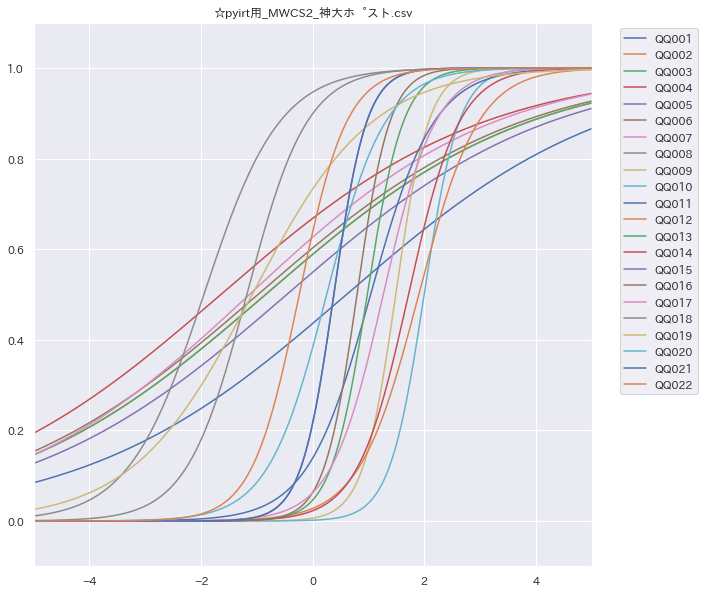

,識別力 a,困難度 b,当て推量 c
QQ001,0.250000,0.607008,0.0
QQ002,0.250000,-0.841652,0.0
QQ003,0.250000,-0.841652,0.0
QQ004,0.250000,-1.644347,0.0
QQ005,0.250000,-0.462534,0.0
QQ006,0.250000,-0.979252,0.0
QQ007,0.268593,-1.131101,0.0
QQ008,1.090454,-1.178356,0.0
QQ009,2.000000,1.490208,0.0
QQ010,1.881552,2.000000,0.0


In [ ]:
print("なぜかわかりませんが、このコードは2回実行する必要があります。")

thetas = np.arange(-5,5,0.01)
D = 1.7

#プロットする変数のセットを入れる配列を作成
pjs = []


# 関数を定義
n = 0
for bj in blist:
  pjtheta = []
  a = alist[n]
  cj = clist[n]
  for theta in thetas:
    pj = 1/(1+np.exp(-D*a*(theta - bj)))
    pj = cj +(1-cj)*pj
    pjtheta.append(pj)
  pjs.append(pjtheta)
  n = n+1

for i in range(0,len(pjs)):
  plt.plot(thetas , pjs[i])

#グラフのプロット
plt.title(fn)
plt.ylim([-0.1,1.1])
plt.xlim([-5,5])
plt.legend(titlelist,loc='upper right' , bbox_to_anchor=(1.2, 1))
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.show()

data = [alist,blist,clist]
df = pd.DataFrame(data)
df.columns = titlelist
df.index = ["識別力 a" , "困難度 b" ,"当て推量 c"]

df.T
